LOGISTICS REGRESSION

LOAN APPROVAL PREDICTION

LIBRARIES IMPORTATION

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

import warnings
warnings.filterwarnings('ignore')

PLOT STYLE

In [2]:
print(plt.style.available)
plt.style.use('tableau-colorblind10')
sns.set_context('notebook')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [3]:
pd.set_option('display.max.row', None)
pd.set_option('display.max.column', None)

DATA LOADING

In [4]:
df = pd.read_csv(r"C:\Users\Dell\Desktop\All dataset\loan_data2.csv")
df.head()

,Loan_ID,Gender,Married,ApplicantIncome,LoanAmount,Loan_Status
0,LP001256,Male,No,3750.0,176.0,N
1,LP001404,Female,Yes,3167.0,154.0,Y
2,LP001370,Male,No,7333.0,120.0,N
3,LP002435,Male,Yes,3539.0,55.0,N
4,LP001877,Male,Yes,4708.0,NaN,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Loan_ID          10000 non-null  object 
 1   Gender           10000 non-null  object 
 2   Married          10000 non-null  object 
 3   ApplicantIncome  9493 non-null   float64
 4   LoanAmount       9164 non-null   float64
 5   Loan_Status      10000 non-null  object 
dtypes: float64(2), object(4)
memory usage: 468.9+ KB


DATA CLEANING

In [6]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
ApplicantIncome    507
LoanAmount         836
Loan_Status          0
dtype: int64

In [7]:
#  Was checking if the data is skewed to decicde if am to use mean or median.
df.describe()

,ApplicantIncome,LoanAmount
count,9493.000000,9164.000000
mean,5311.037607,144.934636
std,5874.619177,82.431963
min,150.000000,9.000000
25%,2876.000000,100.000000
50%,3812.000000,127.000000
75%,5780.000000,168.000000
max,81000.000000,650.000000


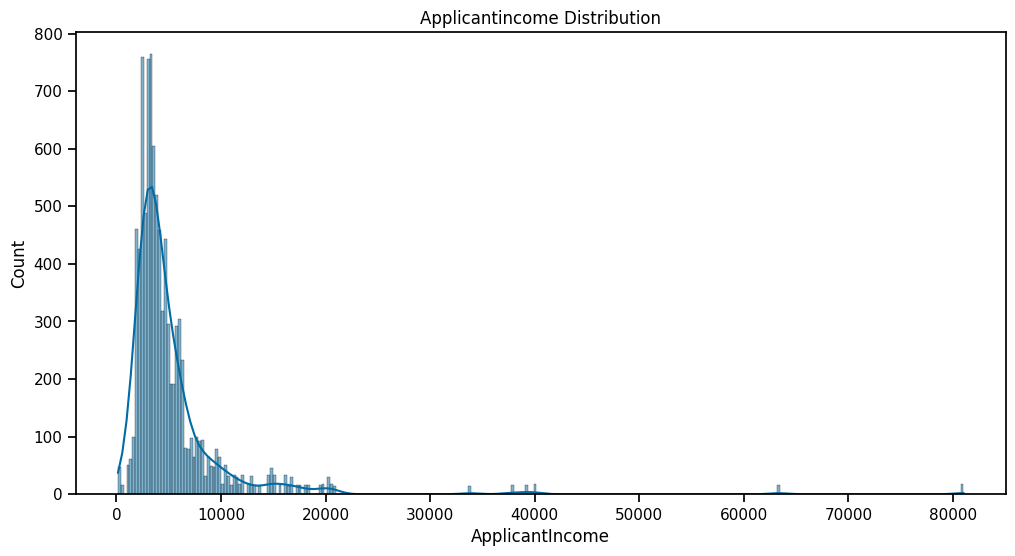

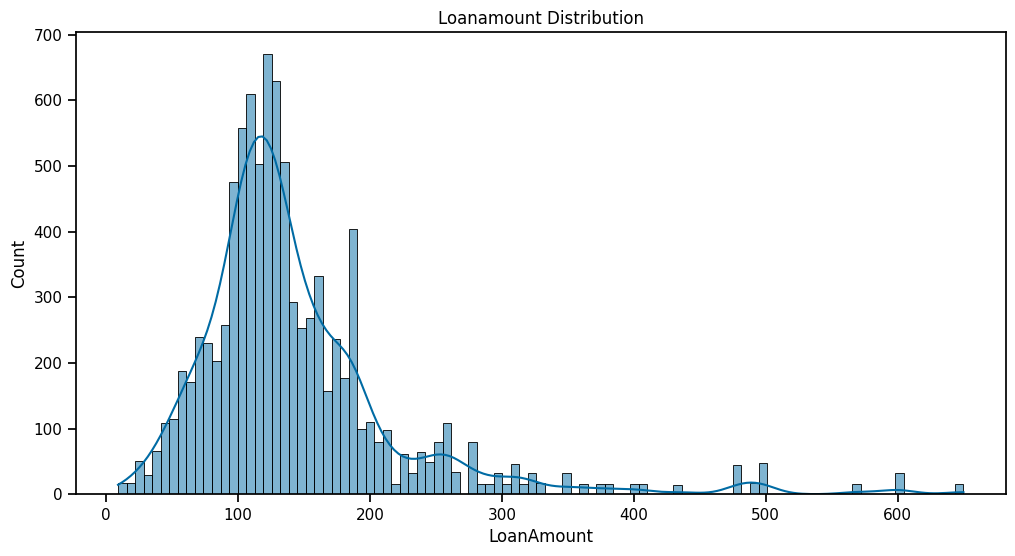

In [8]:
num_col = ['ApplicantIncome', 'LoanAmount']
for col in num_col:
    fig, ax = plt.subplots()
    fig.set_size_inches(12, 6)
    g = sns.histplot(df[col], kde =True)
    g.set_title(f'{col.capitalize()} Distribution')
    plt.show()

Since the values are not normally distributed i will replace nulls with median.

In [9]:
df['ApplicantIncome'].fillna(3812.0, inplace = True)

In [10]:
df['LoanAmount'].fillna(127.0, inplace = True)

In [11]:
df.isna().sum()

Loan_ID            0
Gender             0
Married            0
ApplicantIncome    0
LoanAmount         0
Loan_Status        0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(8697)

In [13]:
df.drop_duplicates(inplace = True)

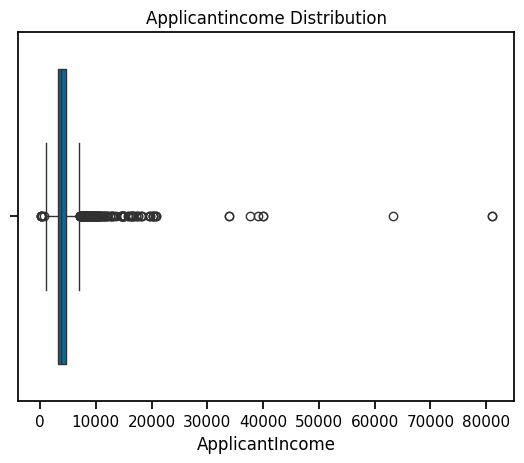

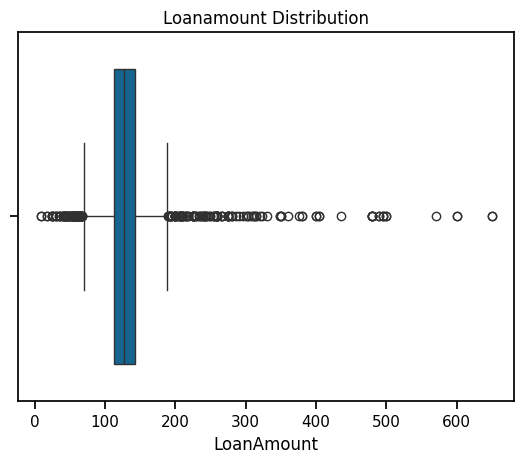

In [14]:
for col in num_col:
    g = sns.boxplot(df[col], orient = 'h')
    g.set_title(f'{col.capitalize()} Distribution')
    plt.show()

In [15]:
for col in num_col:
    df[col] = winsorize(df[col], limits = [0.08, 0.08])

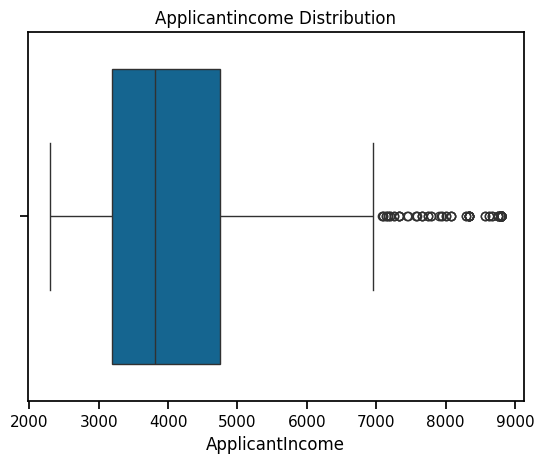

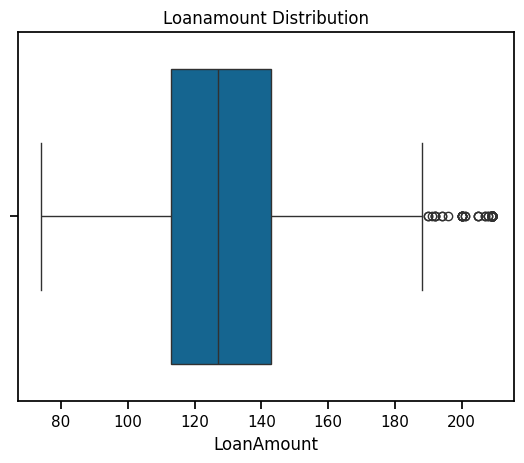

In [16]:
for col in num_col:
    g = sns.boxplot(df[col], orient = 'h')
    g.set_title(f'{col.capitalize()} Distribution')
    plt.show()

Outliers reduced even if they were not totally eliminated. using limit as [0.08, 0.08] removed 8% outlier from bottom and 8% from the top, replacing them with the nearest acceptable values.

In [17]:
df.head()

,Loan_ID,Gender,Married,ApplicantIncome,LoanAmount,Loan_Status
0,LP001256,Male,No,3750.0,176.0,N
1,LP001404,Female,Yes,3167.0,154.0,Y
2,LP001370,Male,No,7333.0,120.0,N
3,LP002435,Male,Yes,3539.0,74.0,N
4,LP001877,Male,Yes,4708.0,127.0,Y


DATA PROCESSING

In [18]:
le = LabelEncoder()
for col in df.select_dtypes(include = ['object']):
    df[col] = le.fit_transform(df[col])
df.head()    

,Loan_ID,Gender,Married,ApplicantIncome,LoanAmount,Loan_Status
0,75,1,0,3750.0,176.0,0
1,114,0,1,3167.0,154.0,1
2,105,1,0,7333.0,120.0,0
3,438,1,1,3539.0,74.0,0
4,260,1,1,4708.0,127.0,1


In [19]:
X = df.drop(['Loan_Status'], axis = 1)
y = df['Loan_Status']

In [20]:
y.value_counts()

Loan_Status
1    890
0    413
Name: count, dtype: int64

In [21]:
X.head()

,Loan_ID,Gender,Married,ApplicantIncome,LoanAmount
0,75,1,0,3750.0,176.0
1,114,0,1,3167.0,154.0
2,105,1,0,7333.0,120.0
3,438,1,1,3539.0,74.0
4,260,1,1,4708.0,127.0


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 26, stratify = y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(977, 5) (326, 5) (977,) (326,)


In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

MODELING BUILDING AND TRAINING

In [24]:
model = LogisticRegression(max_iter = 1000)

model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

MODEL TESTING AND EVALUATION

In [25]:
y_pred = model.predict(X_test_scaled)

In [26]:
print(f'Accuracy Score is {accuracy_score(y_test, y_pred)}')
print(f'Precision Score is {precision_score(y_test, y_pred)}')
print(f'Recall Score is {recall_score(y_test, y_pred)}')
print(f'F1 Score is {f1_score(y_test, y_pred)}')

Accuracy Score is 0.6809815950920245
Precision Score is 0.683076923076923
Recall Score is 0.9955156950672646
F1 Score is 0.8102189781021898


In [27]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[  0, 103],
       [  1, 222]])

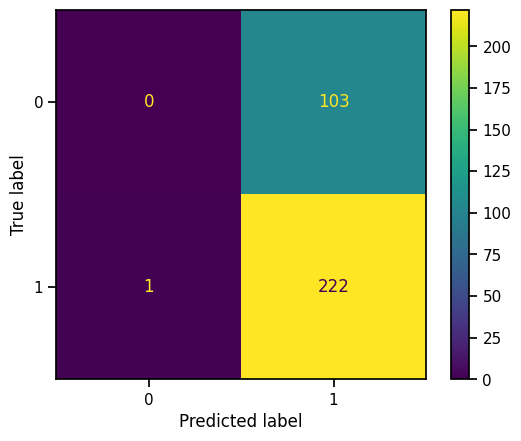

In [28]:
matrix = ConfusionMatrixDisplay(cm, display_labels = model.classes_)
matrix.plot()

REAL TIME PREDICTION

In [29]:
data = {
    'Loan_ID' : ['FA1003', 'FA2002', 'FA1005', 'FA2003'],
    'Gender' : ['Female', 'Male', 'Male', 'Female'],
    'Married' : ['No', 'Yes', 'No', 'No'],
    'ApplicantIncome' : [4500.0, 4200.0, 3000.0, 2860.0],
    'LoanAmount' : [125.0, 226.0, 432.0, 150.0 ]
}
data

{'Loan_ID': ['FA1003', 'FA2002', 'FA1005', 'FA2003'],
 'Gender': ['Female', 'Male', 'Male', 'Female'],
 'Married': ['No', 'Yes', 'No', 'No'],
 'ApplicantIncome': [4500.0, 4200.0, 3000.0, 2860.0],
 'LoanAmount': [125.0, 226.0, 432.0, 150.0]}

In [30]:
data_df = pd.DataFrame(data)
data_df

,Loan_ID,Gender,Married,ApplicantIncome,LoanAmount
0,FA1003,Female,No,4500.0,125.0
1,FA2002,Male,Yes,4200.0,226.0
2,FA1005,Male,No,3000.0,432.0
3,FA2003,Female,No,2860.0,150.0


In [31]:
for col in data_df.select_dtypes(include = ['object']):
    data_df[col] = le.fit_transform(data_df[[col]])
for col in data_df.columns:
    data_df[col] = scaler.fit_transform(data_df[[col]])
data_df.head()

,Loan_ID,Gender,Married,ApplicantIncome,LoanAmount
0,-1.341641,-1.0,-0.577350,1.195136,-0.897400
1,0.447214,1.0,1.732051,0.778228,-0.060103
2,-0.447214,1.0,-0.577350,-0.889404,1.647652
3,1.341641,-1.0,-0.577350,-1.083961,-0.690148


In [32]:
model.predict(data_df)

array([1, 1, 1, 1])

LINEAR REGRESSION

DATA IMPORTATION

In [33]:
vehicles_df = pd.read_csv(r"C:\Users\Dell\Desktop\All dataset\electric_vehicles_spec_2025.csv.csv")
vehicles_df.head()

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,fast_charge_port,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,Abarth,500e Convertible,155,37.8,Lithium-ion,192.0,235.0,156,225,7.0,67.0,CCS,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,192.0,235.0,149,225,7.0,67.0,CCS,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,102.0,345.0,158,280,5.9,79.0,CCS,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3057/Abarth-600e-S...
3,Abarth,600e Turismo,200,50.8,Lithium-ion,102.0,345.0,158,280,6.2,79.0,CCS,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3056/Abarth-600e-T...
4,Aiways,U5,150,60.0,Lithium-ion,NaN,310.0,156,315,7.5,78.0,CCS,NaN,496,5,FWD,JC - Medium,4680,1865,1700,SUV,https://ev-database.org/car/1678/Aiways-U5


In [34]:
print('Information about electric vehicles dataset')
vehicles_df.info()

Information about electric vehicles dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      478 non-null    object 
 1   model                      477 non-null    object 
 2   top_speed_kmh              478 non-null    int64  
 3   battery_capacity_kWh       478 non-null    float64
 4   battery_type               478 non-null    object 
 5   number_of_cells            276 non-null    float64
 6   torque_nm                  471 non-null    float64
 7   efficiency_wh_per_km       478 non-null    int64  
 8   range_km                   478 non-null    int64  
 9   acceleration_0_100_s       478 non-null    float64
 10  fast_charging_power_kw_dc  477 non-null    float64
 11  fast_charge_port           477 non-null    object 
 12  towing_capacity_kg         452 non-null    float64
 13  cargo_

DATA CLEANING

In [35]:
#  Chekcking for missing values
vehicles_df.isna().sum()

brand                          0
model                          1
top_speed_kmh                  0
battery_capacity_kWh           0
battery_type                   0
number_of_cells              202
torque_nm                      7
efficiency_wh_per_km           0
range_km                       0
acceleration_0_100_s           0
fast_charging_power_kw_dc      1
fast_charge_port               1
towing_capacity_kg            26
cargo_volume_l                 1
seats                          0
drivetrain                     0
segment                        0
length_mm                      0
width_mm                       0
height_mm                      0
car_body_type                  0
source_url                     0
dtype: int64

In [36]:
# torque_nm is a measure of rational force that the vechicle can produce, which is measured in newton meter
# The number of battery cell in the electric vechicles. 
# Battery cell are basic unit that stores electrical energy.
# cargo_volume_l is the Number of space available for goods.
# towing_capacity_kg is the maximum weight in kg

In [37]:
vehicles_df.duplicated().sum()
#  There are no duplicate.

np.int64(0)

In [38]:
vehicles_df.drop(['number_of_cells', 'source_url'], axis = 1, inplace = True)

In [39]:
#  Convert into a numerical column and remove any string
vehicles_df['cargo_volume_l'] = pd.to_numeric(vehicles_df['cargo_volume_l'], errors = 'coerce')

In [40]:
vehicles_df.describe()

,top_speed_kmh,battery_capacity_kWh,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,towing_capacity_kg,cargo_volume_l,seats,length_mm,width_mm,height_mm
count,478.000000,478.000000,471.000000,478.000000,478.000000,478.000000,477.000000,452.000000,474.000000,478.000000,478.000000,478.000000,478.000000
mean,185.487448,74.043724,498.012739,162.903766,393.179916,6.882636,125.008386,1052.261062,493.860759,5.263598,4678.506276,1887.359833,1601.125523
std,34.252773,20.331058,241.461128,34.317532,103.287335,2.730696,58.205012,737.851774,187.005674,1.003961,369.210573,73.656807,130.754851
min,125.000000,21.300000,113.000000,109.000000,135.000000,2.200000,29.000000,0.000000,151.000000,2.000000,3620.000000,1610.000000,1329.000000
25%,160.000000,60.000000,305.000000,143.000000,320.000000,4.800000,80.000000,500.000000,385.000000,5.000000,4440.000000,1849.000000,1514.000000
50%,180.000000,76.150000,430.000000,155.000000,397.500000,6.600000,113.000000,1000.000000,470.000000,5.000000,4720.000000,1890.000000,1596.000000
75%,201.000000,90.600000,679.000000,177.750000,470.000000,8.200000,150.000000,1600.000000,544.500000,5.000000,4961.000000,1939.000000,1665.000000
max,325.000000,118.000000,1350.000000,370.000000,685.000000,19.100000,281.000000,2500.000000,1410.000000,9.000000,5908.000000,2080.000000,1986.000000


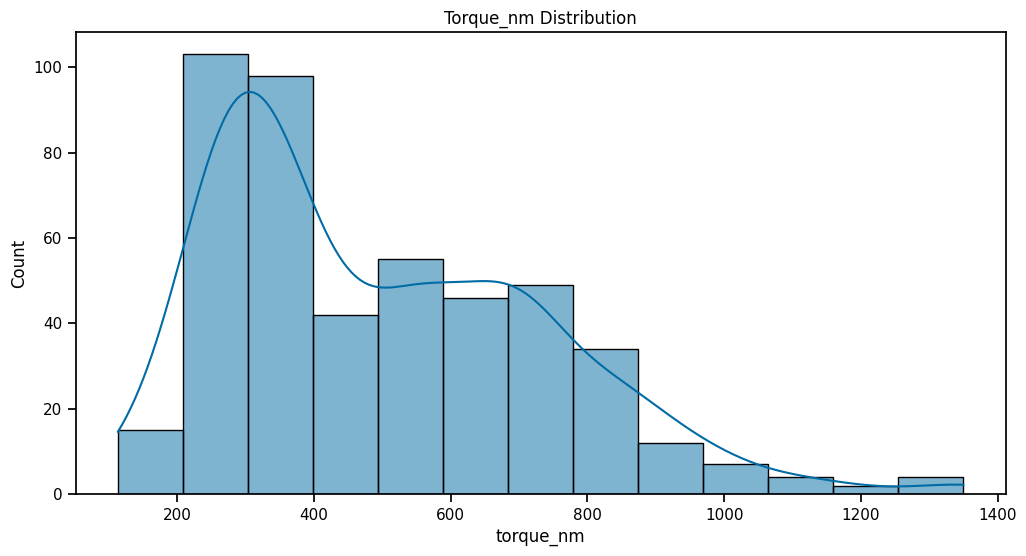

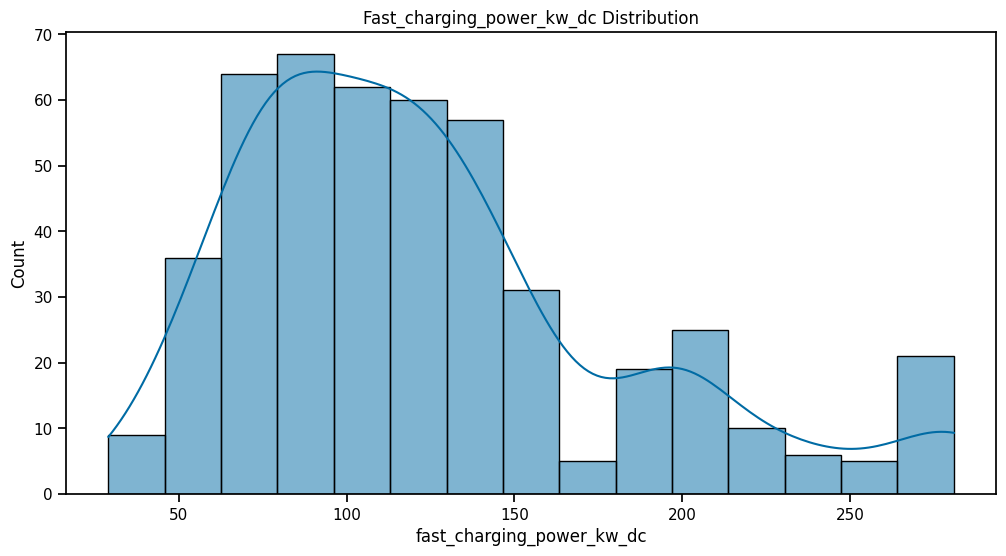

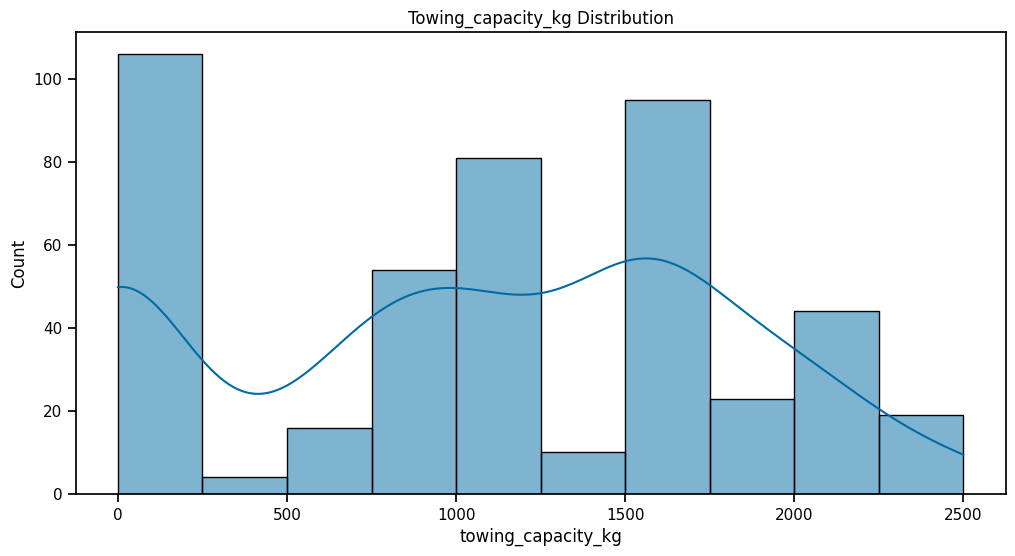

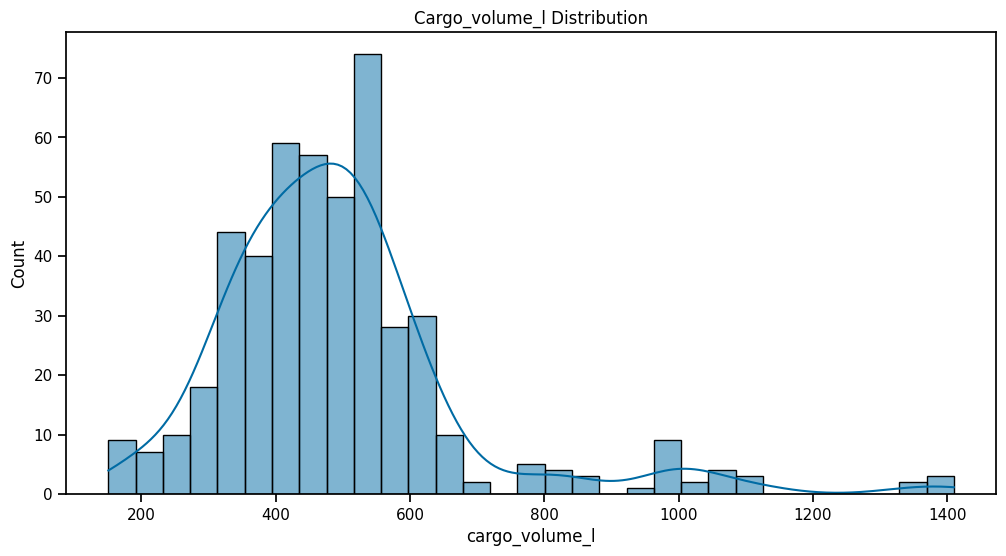

In [41]:
num_col = ['torque_nm', 'fast_charging_power_kw_dc', 'towing_capacity_kg', 'cargo_volume_l']                
for col in num_col:
    fig, ax = plt.subplots()
    fig.set_size_inches(12, 6)
    g = sns.histplot(vehicles_df[col], kde =True)
    g.set_title(f'{col.capitalize()} Distribution')
    plt.show()

SINCE THE VALUES ARE NOT NORMALLY DISTRIBUTED, I WILL REPLACE NULLS WITH MEDIAN

In [42]:
vehicles_df['torque_nm'].fillna(430.0, inplace = True)

In [43]:
vehicles_df['fast_charging_power_kw_dc'].fillna(113.0, inplace = True)

In [44]:
vehicles_df['towing_capacity_kg'].fillna(1000.0, inplace = True)

In [45]:
vehicles_df['cargo_volume_l'].fillna(470.0, inplace = True)

In [46]:
vehicles_df['fast_charge_port'].value_counts()

fast_charge_port
CCS        476
CHAdeMO      1
Name: count, dtype: int64

In [47]:
vehicles_df['fast_charge_port'].fillna('CCS', inplace = True)

In [48]:
vehicles_df.dropna(inplace = True)

In [49]:
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 477 entries, 0 to 476
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      477 non-null    object 
 1   model                      477 non-null    object 
 2   top_speed_kmh              477 non-null    int64  
 3   battery_capacity_kWh       477 non-null    float64
 4   battery_type               477 non-null    object 
 5   torque_nm                  477 non-null    float64
 6   efficiency_wh_per_km       477 non-null    int64  
 7   range_km                   477 non-null    int64  
 8   acceleration_0_100_s       477 non-null    float64
 9   fast_charging_power_kw_dc  477 non-null    float64
 10  fast_charge_port           477 non-null    object 
 11  towing_capacity_kg         477 non-null    float64
 12  cargo_volume_l             477 non-null    float64
 13  seats                      477 non-null    int64  
 14 

DETECTING AND MITIGATING OUTLIERS

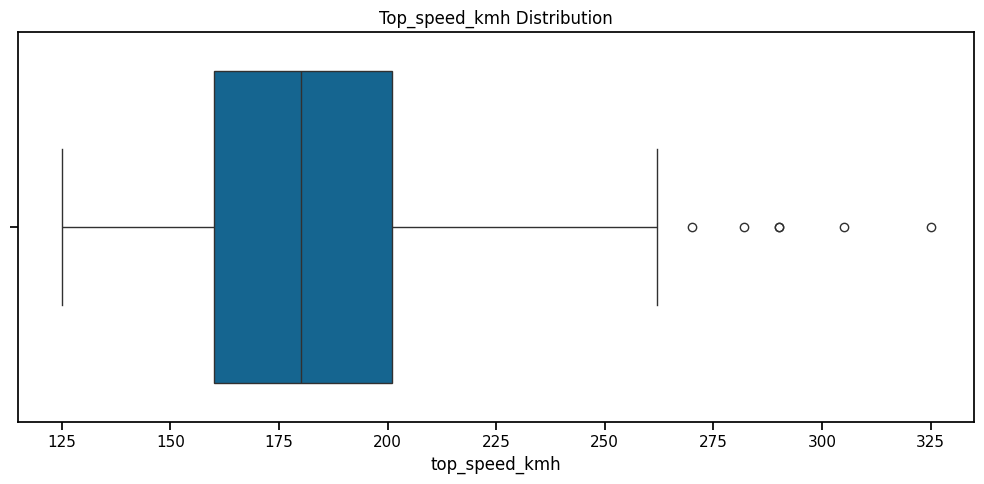

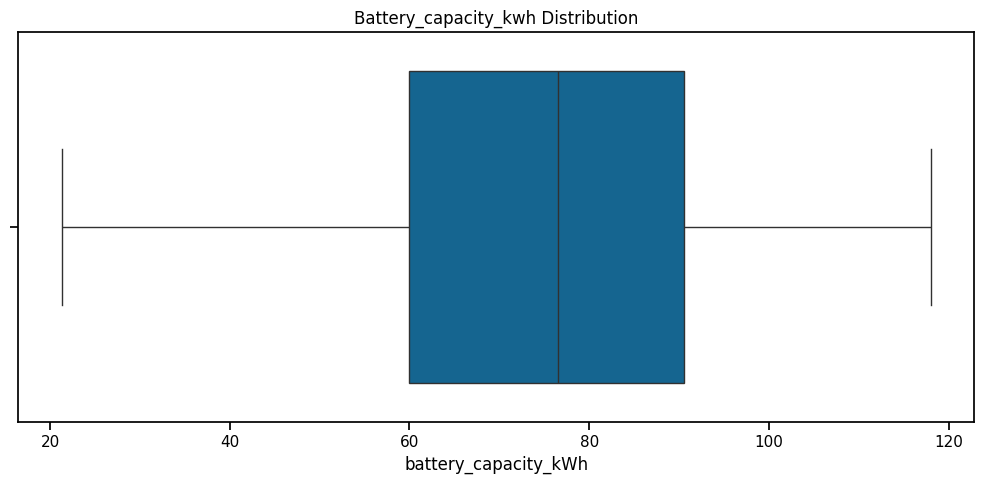

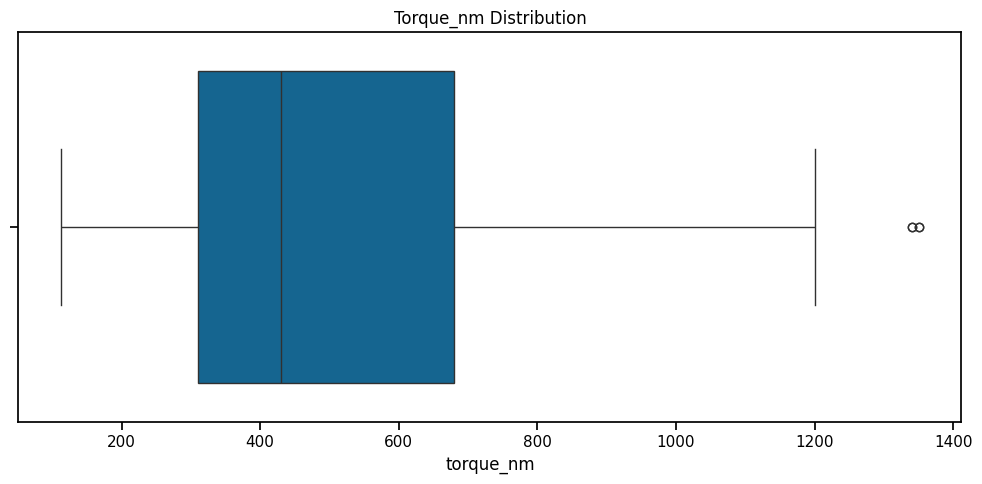

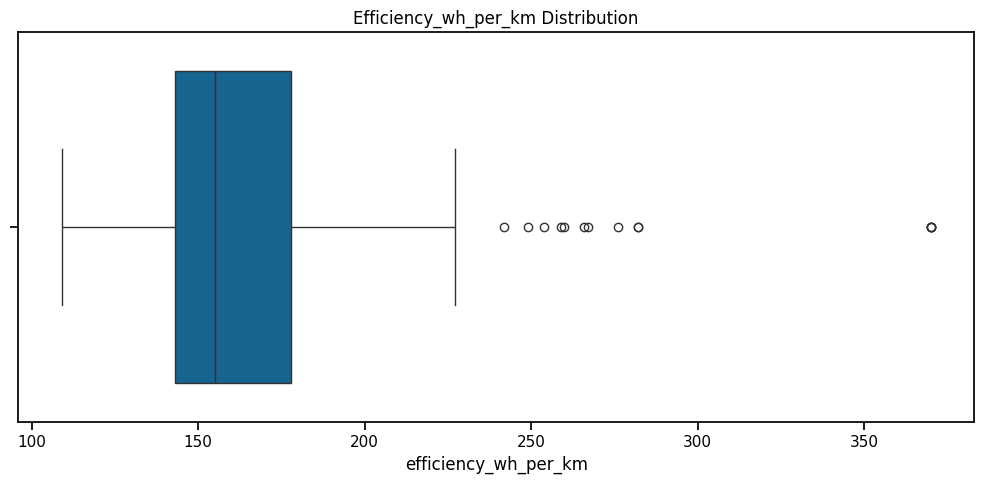

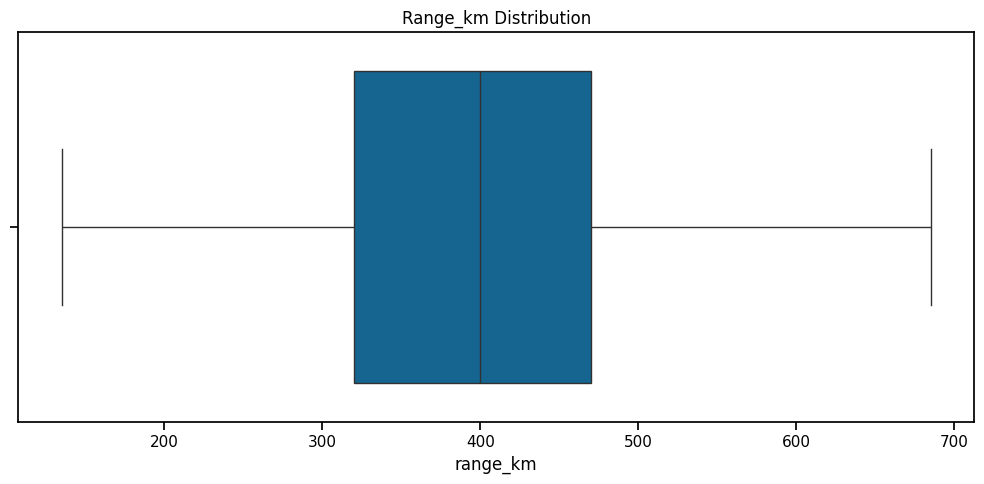

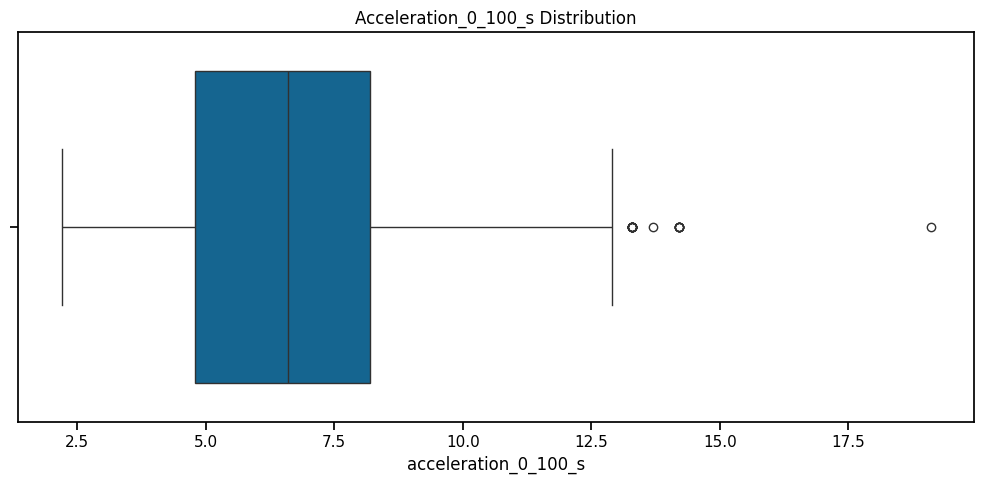

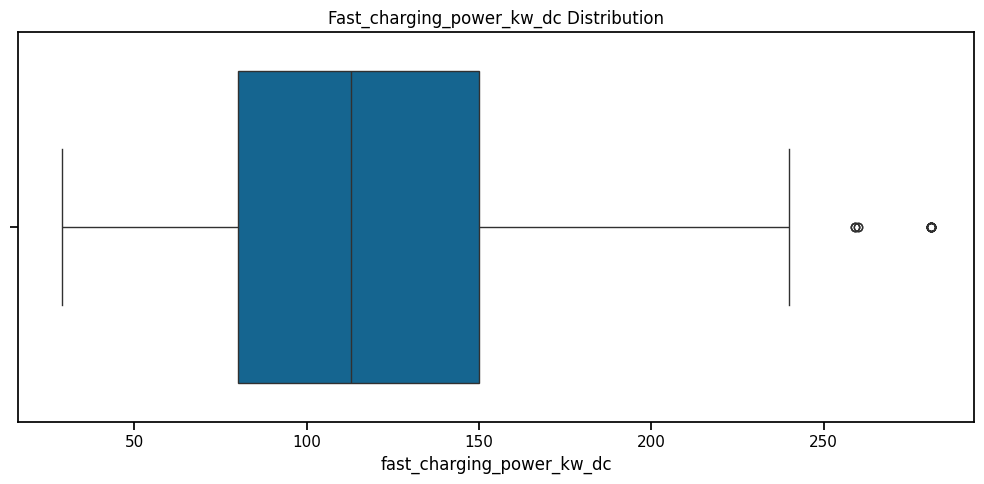

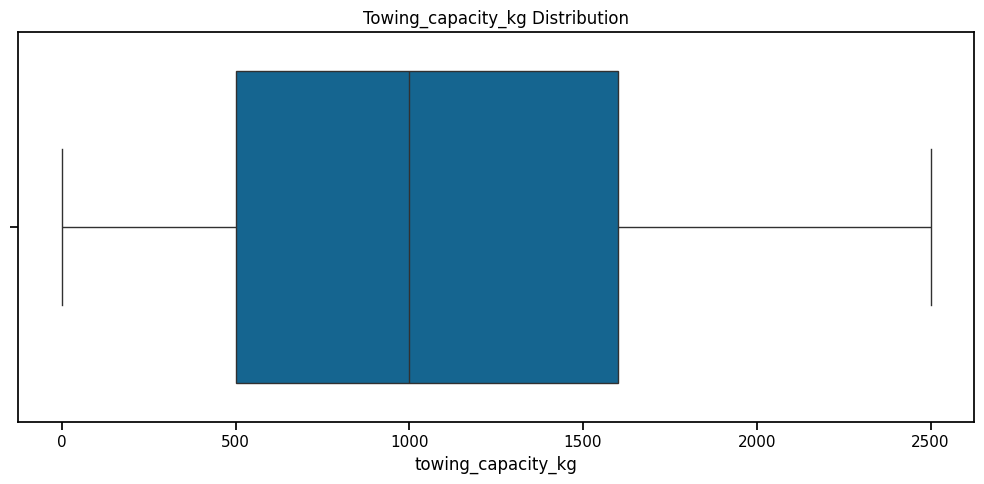

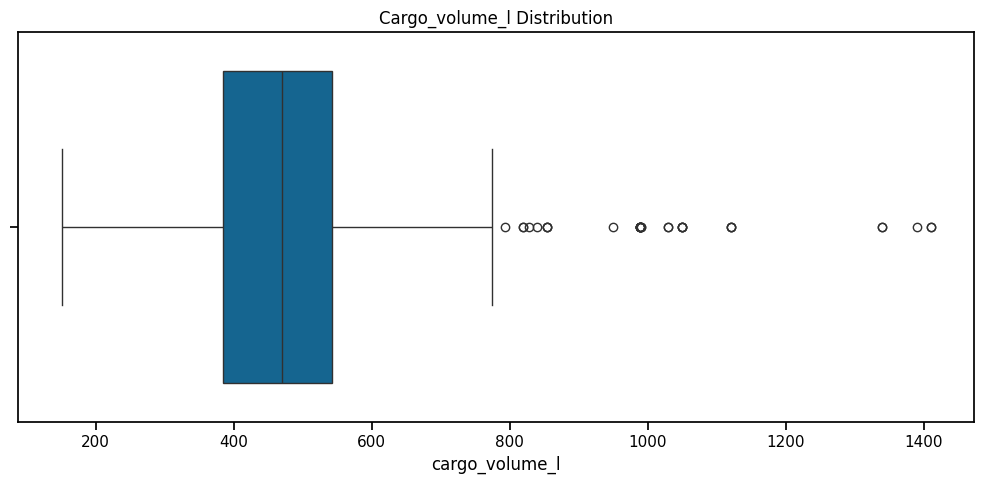

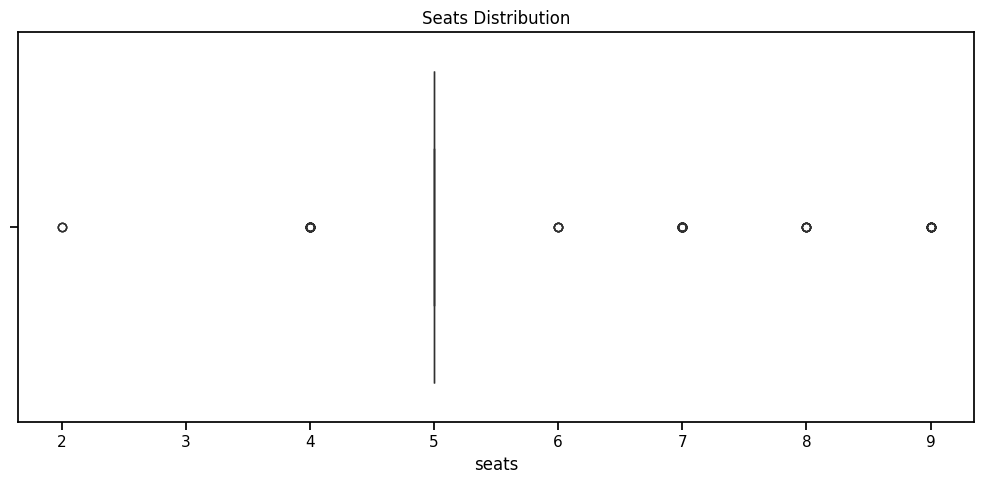

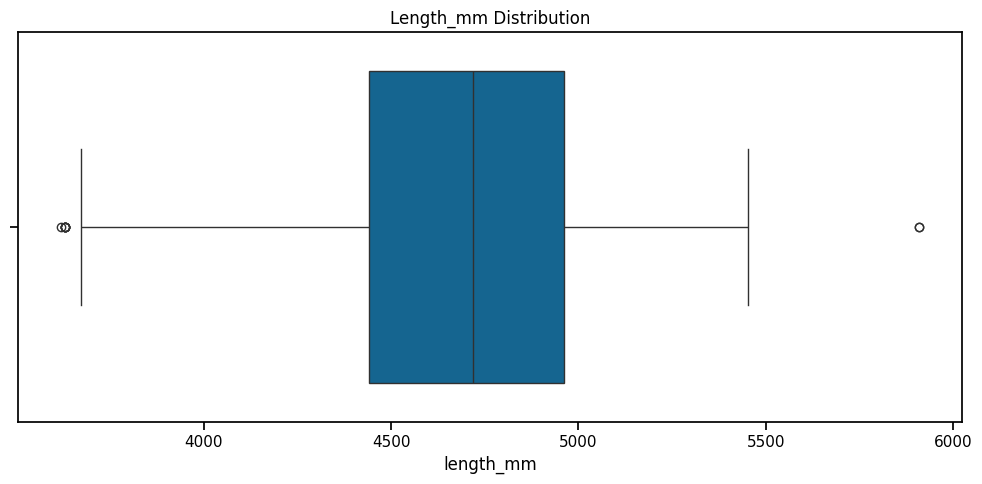

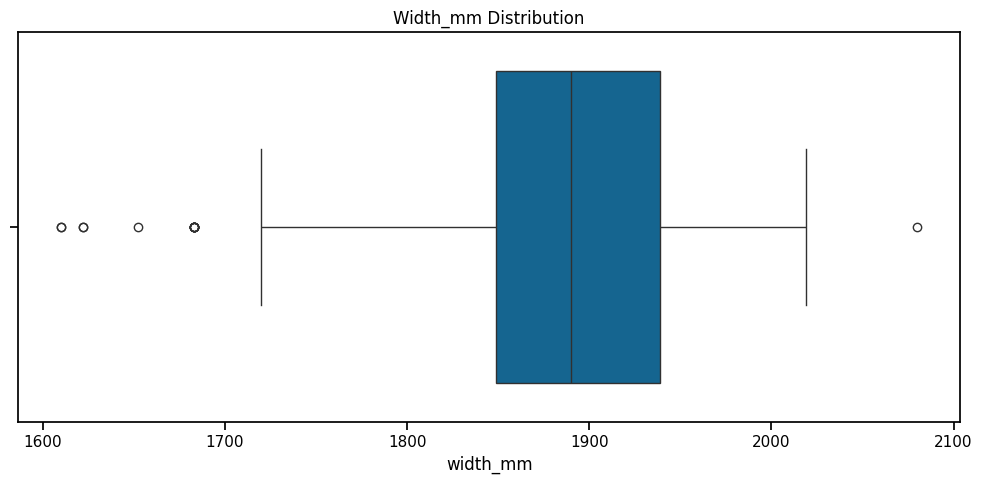

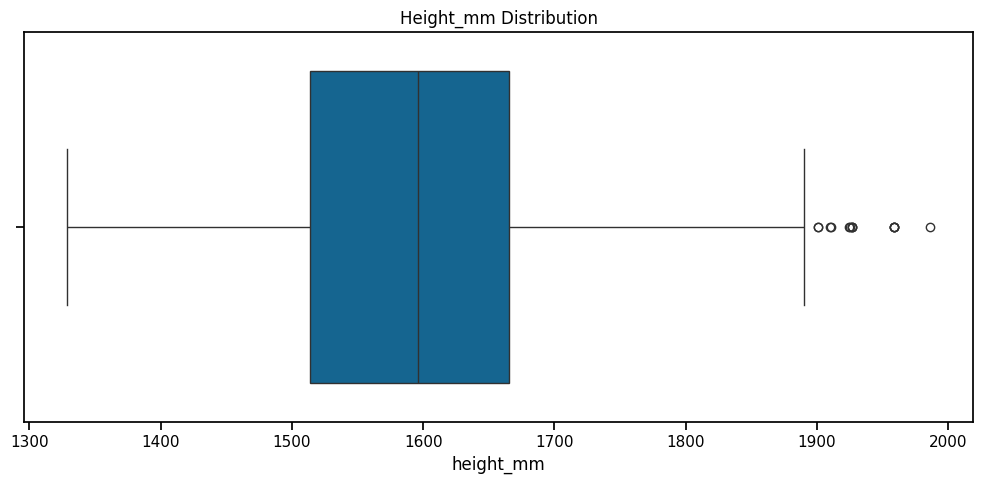

In [50]:
num_col = vehicles_df.select_dtypes(include = ['int', 'float'])
for col in num_col:
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 5)
    g = sns.boxplot(vehicles_df[col], orient = 'h')
    g.set_title(f'{col.capitalize()} Distribution')
    plt.tight_layout()
    plt.show()

In [51]:
for col in num_col:
    vehicles_df[col] = winsorize(vehicles_df[col], limits = [0.08, 0.08])

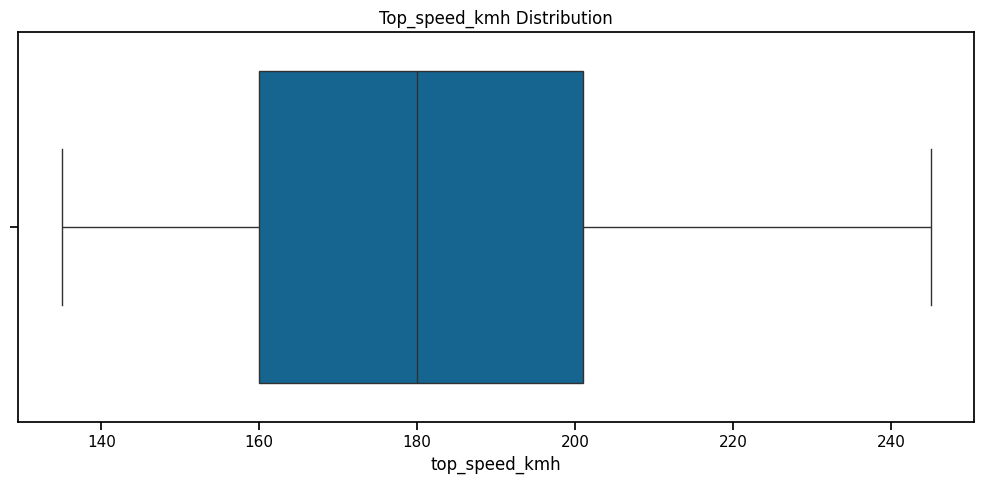

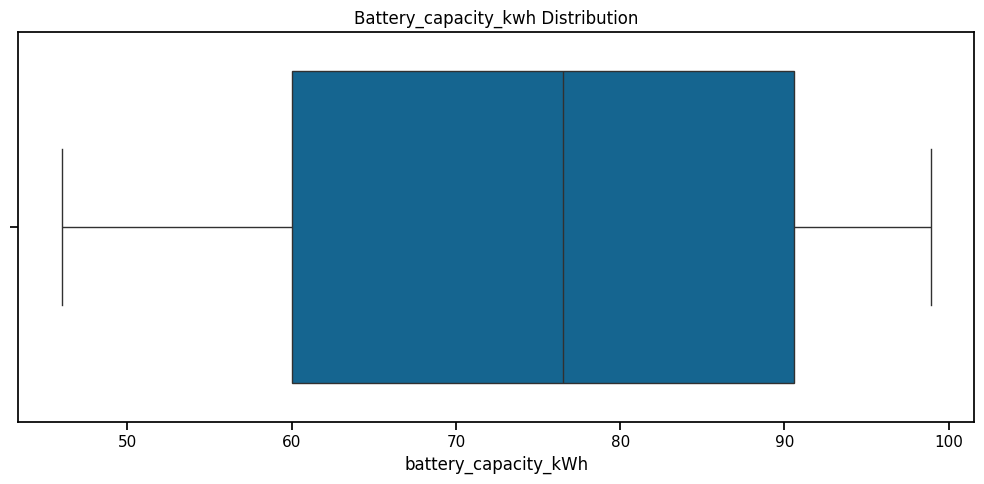

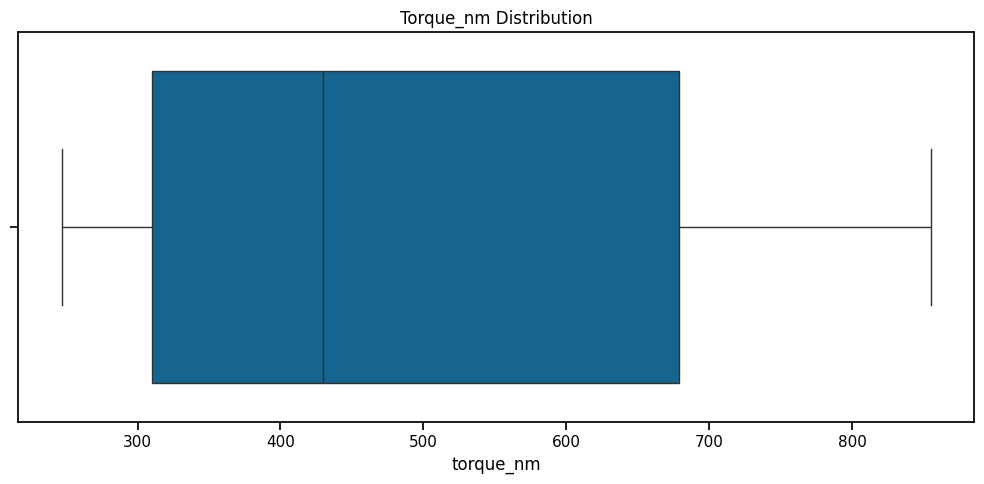

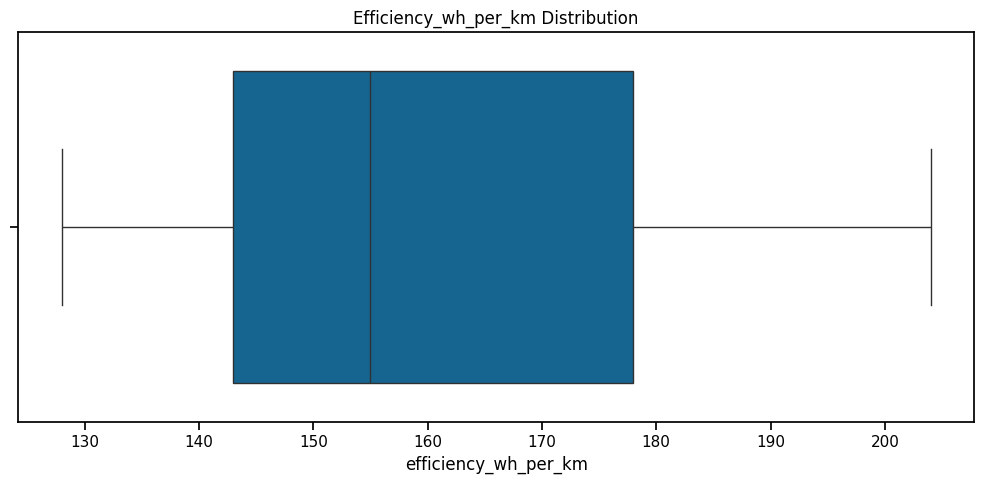

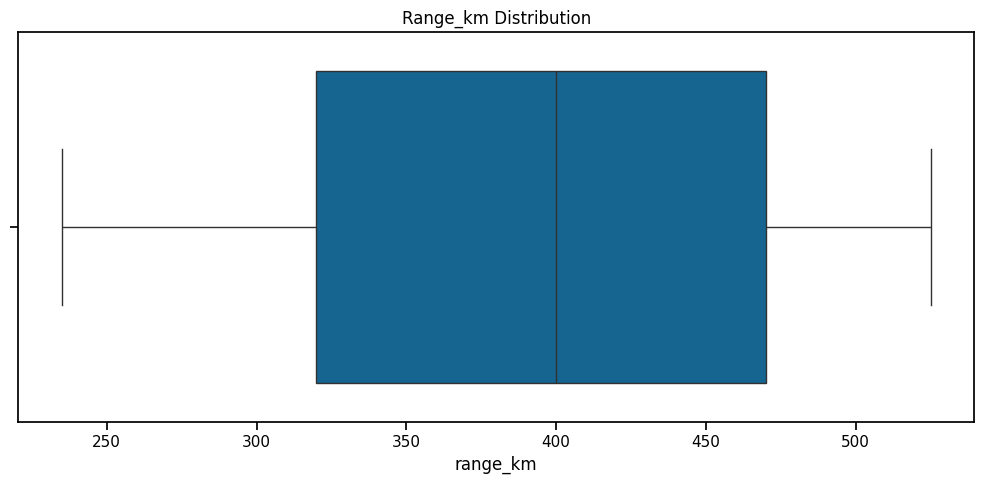

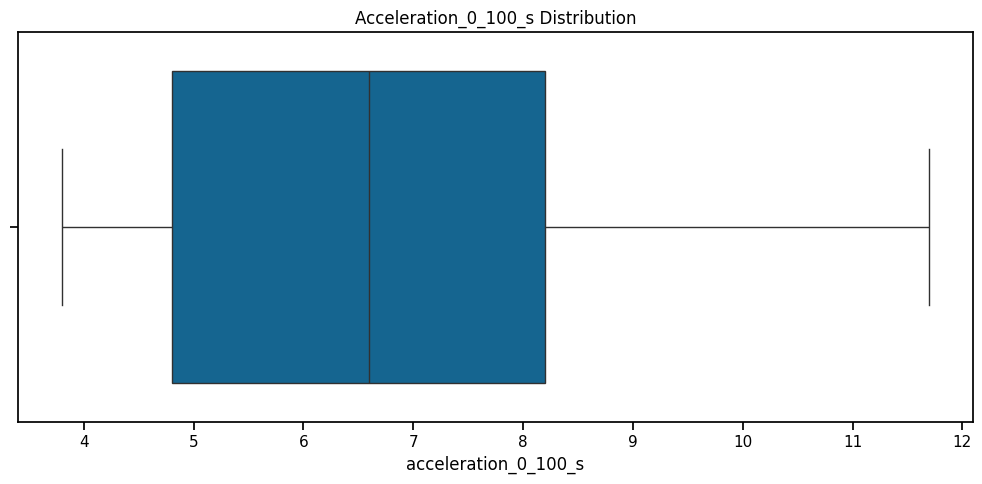

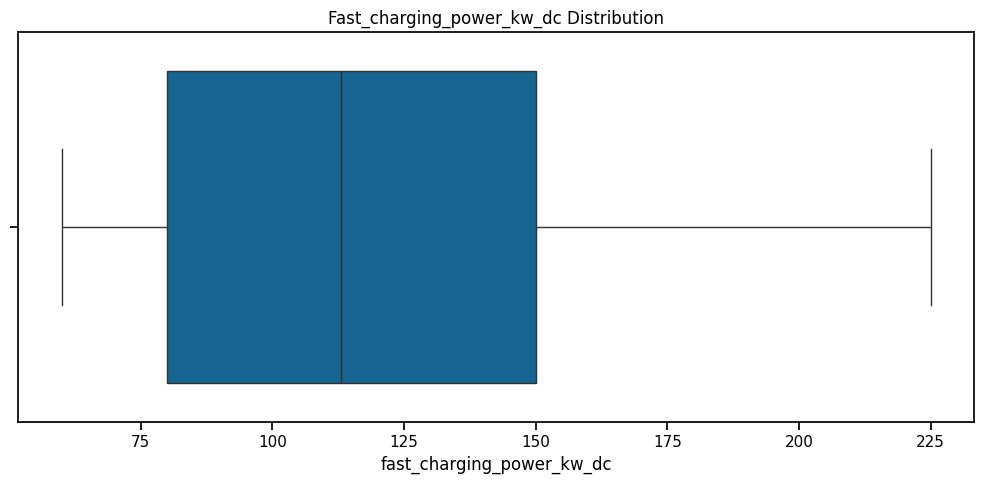

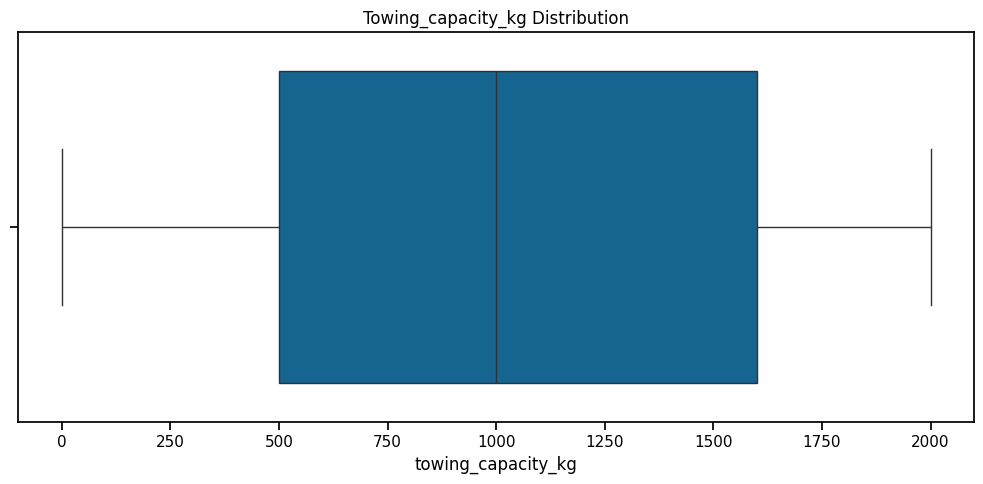

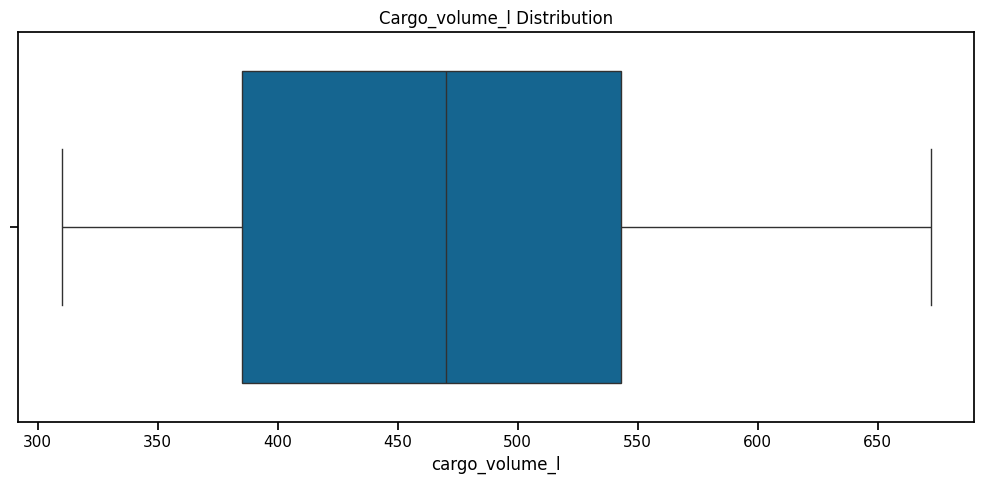

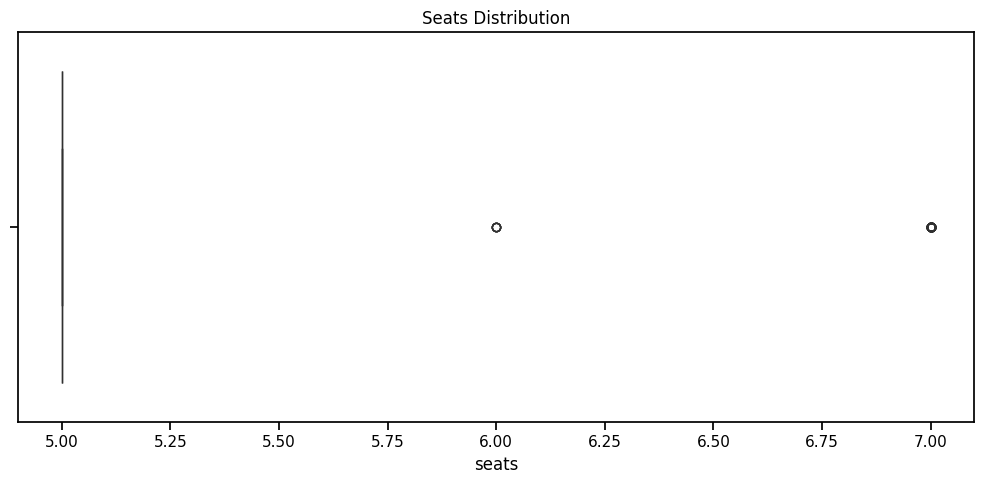

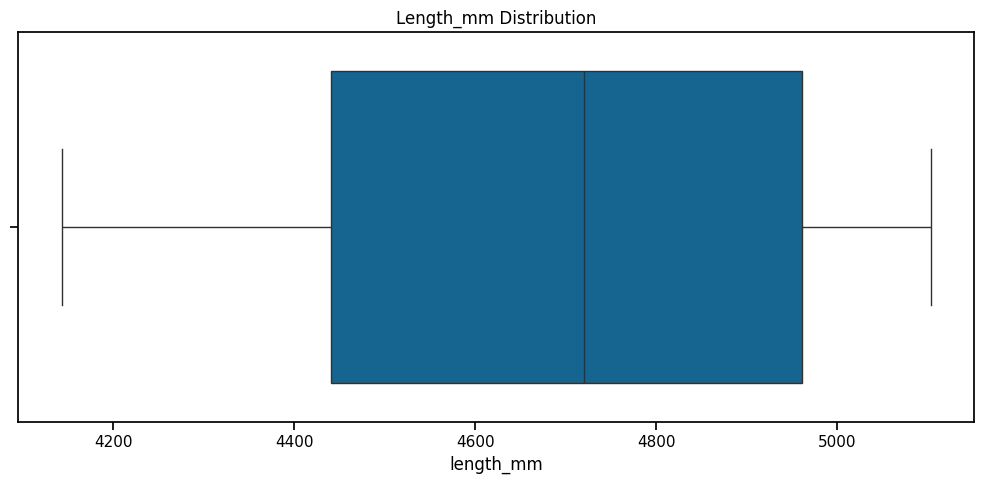

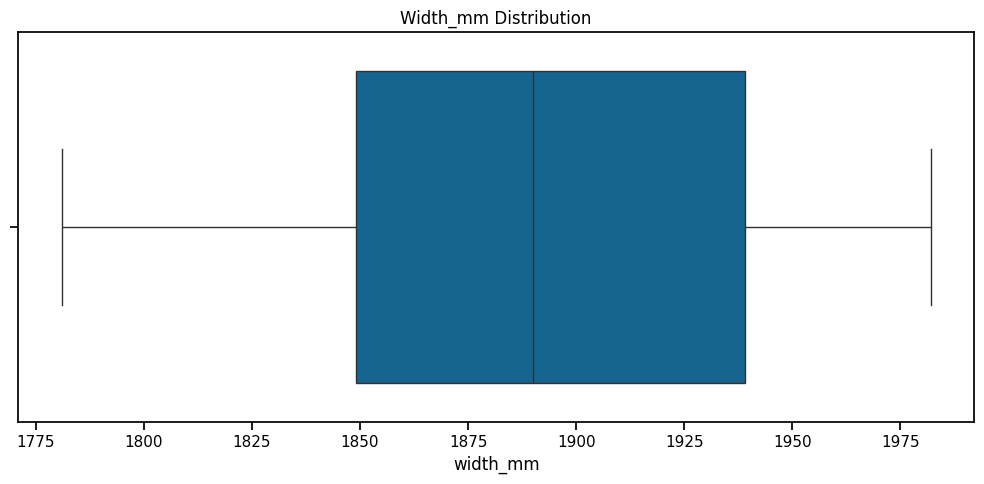

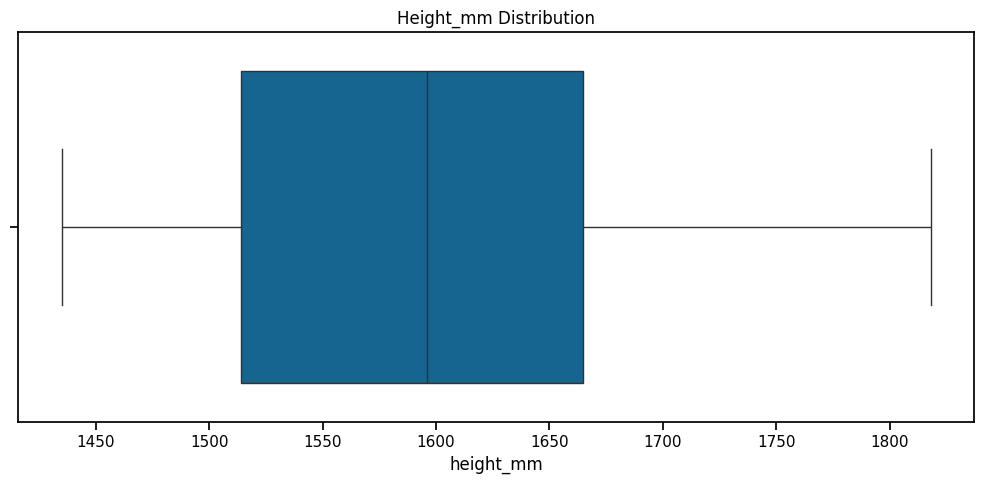

In [52]:
for col in num_col:
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 5)
    g = sns.boxplot(vehicles_df[col], orient = 'h')
    g.set_title(f'{col.capitalize()} Distribution')
    plt.tight_layout()
    plt.show()

In [53]:
cat_col = vehicles_df.select_dtypes(include = ['object'])
le = LabelEncoder()
for col in cat_col:
    vehicles_df[col] = le.fit_transform(vehicles_df[col])

In [54]:
vehicles_df.head()

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,fast_charge_port,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type
0,0,46,155,46.0,0,247.0,156,235,7.0,67.0,0,0.0,310.0,5,1,1,4143,1781,1518,2
1,0,47,155,46.0,0,247.0,149,235,7.0,67.0,0,0.0,310.0,5,1,1,4143,1781,1518,2
2,0,51,200,50.8,0,345.0,158,280,5.9,79.0,0,0.0,360.0,5,1,9,4187,1781,1557,4
3,0,52,200,50.8,0,345.0,158,280,6.2,79.0,0,0.0,360.0,5,1,9,4187,1781,1557,4
4,1,396,150,60.0,0,310.0,156,315,7.5,78.0,0,1000.0,496.0,5,1,10,4680,1865,1700,4


In [55]:
X = vehicles_df.drop(['range_km'], axis = 1)
y = vehicles_df['range_km']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(381, 19) (96, 19) (381,) (96,)


In [57]:
ss = StandardScaler()
X_train = pd.DataFrame(ss.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(ss.transform(X_test), columns = X_test.columns)

In [58]:
model = LinearRegression()

selector = RFE(estimator = model, n_features_to_select = 5)
selector.fit(X, y)
selected_features = X.columns[selector.support_]
print(selected_features)

Index(['battery_capacity_kWh', 'acceleration_0_100_s', 'fast_charge_port',
       'seats', 'drivetrain'],
      dtype='object')


In [59]:
X_train_new = X_train[selected_features]
X_test_new = X_test[selected_features]

In [60]:
model.fit(X_train_new, y_train)

LinearRegression()

MODEL TESTING AND EVALUATION

In [61]:
y_pred = model.predict(X_test_new)

In [62]:
r2 = r2_score(y_test, y_pred)
r2

0.8813186645161957

In [63]:
mae = mean_absolute_error(y_test, y_pred)
mae

27.394529942784136

In [64]:
mse = mean_squared_error(y_test, y_pred)
mse

1065.9888399642762

In [65]:
rmse = root_mean_squared_error(y_test, y_pred)
rmse

32.649484528308804

In [66]:
y_max_20 = 0.2 * y.max()
y_max_20

np.float64(105.0)

In [67]:
rmse < y_max_20

np.True_

ASSUMPTION VALIDATION

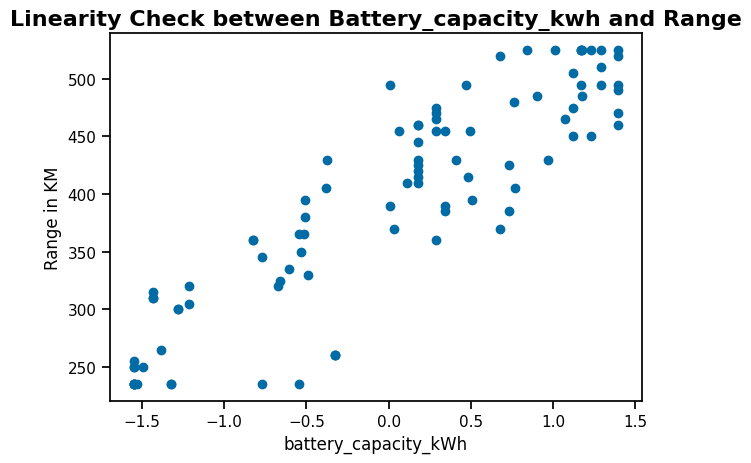

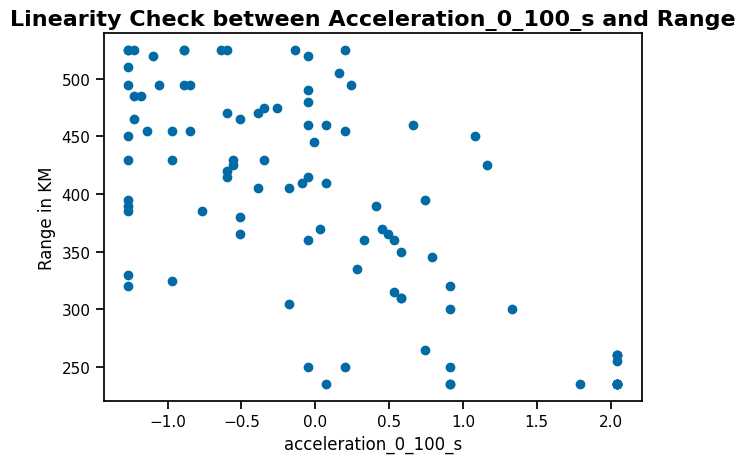

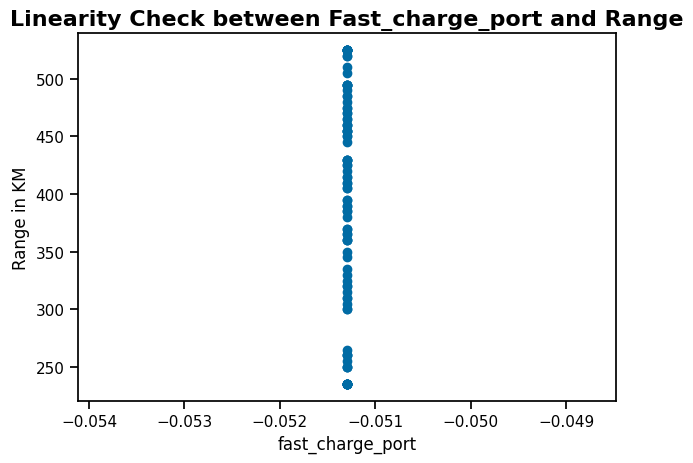

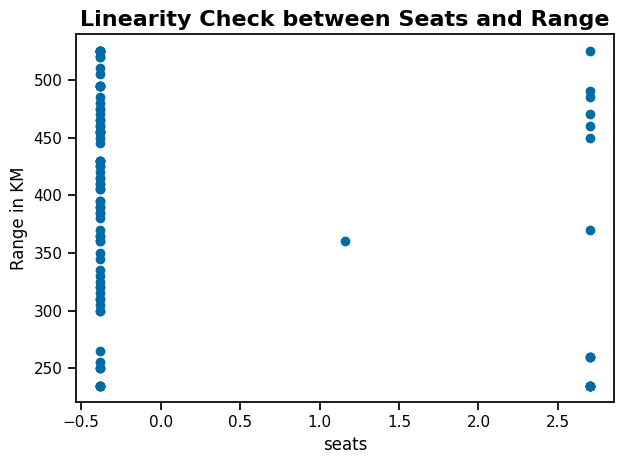

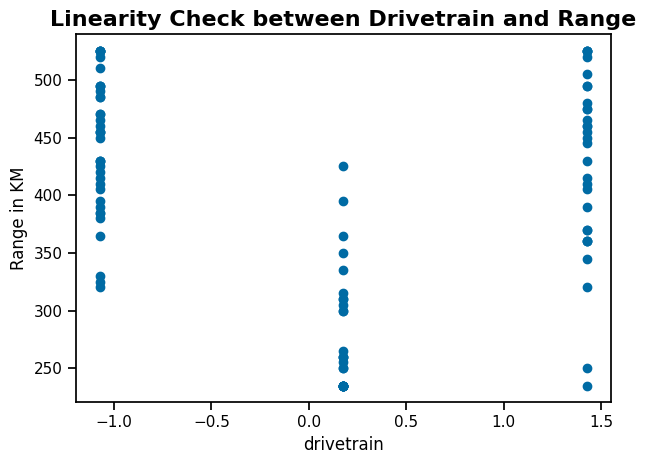

In [68]:
for i in X_test_new:
    fig, ax = plt.subplots()
    ax.scatter(x = X_test_new[i], y = y_test)
    ax.set_title(f'Linearity Check between {i.capitalize()} and Range', fontsize = 16, fontweight = 'bold')
    ax.set_xlabel(f'{i}', fontsize = 12)
    ax.set_ylabel('Range in KM', fontsize = 12)
    fig.tight_layout()
    plt.show()

In [69]:
residual = y_test - y_pred

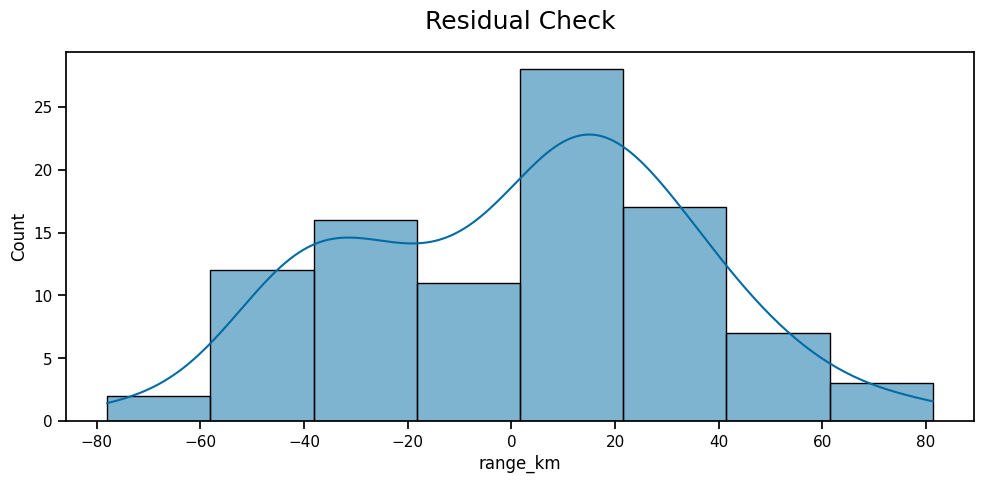

In [70]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
g = sns.histplot(residual, kde = True)
g.set_title('Residual Check', fontsize = 18, y = 1.04)
plt.tight_layout()
plt.show()

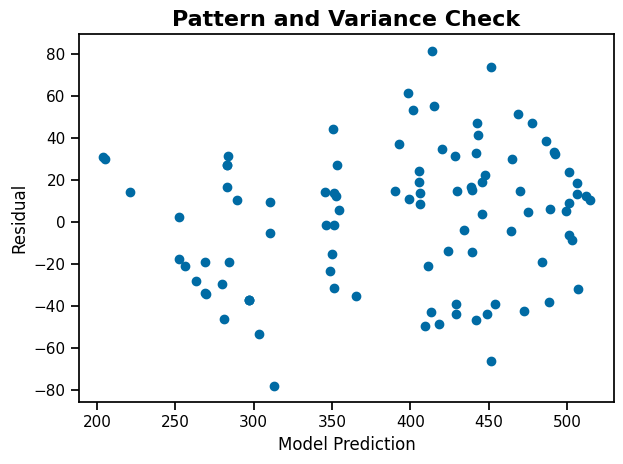

In [71]:
fig, ax = plt.subplots()
ax.scatter(x = y_pred, y = residual)
ax.set_title(f'Pattern and Variance Check', fontsize = 16, fontweight = 'bold')
ax.set_xlabel("Model Prediction", fontsize = 12)
ax.set_ylabel('Residual', fontsize = 12)
fig.tight_layout()
plt.show()